<a href="https://colab.research.google.com/github/Gaukhar-ai/Capstone/blob/master/alpaca_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpaca-trade-api --quiet
!pip install pandas-ta --quiet
!pip install -U git+https://github.com/twopirllc/pandas-ta

     |████████████████████████████████| 204kB 7.5MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 81kB 3.6MB/s 
  Cloning https://github.com/twopirllc/pandas-ta to /tmp/pip-req-build-qtlyhht0
  Running command git clone -q https://github.com/twopirllc/pandas-ta /tmp/pip-req-build-qtlyhht0
  Created wheel for pandas-ta: filename=pandas_ta-0.2.28b0-cp36-none-any.whl size=162527 sha256=eac03dfcc4dbffa316efa0074bf1d3a2e88deb5cfa3c933895c0dd130db8c4e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-6yxj61hc/wheels/64/67/96/15e918c3b53b4a323b5bd037c7f08be5ef6908141c50f07c76
Successfully built pandas-ta
  Found existing installation: pandas-ta 0.2.23b0
    Uninstalling pandas-ta-0.2.23b0:
      Successfully uninstalled pandas-ta-0.2.23b0


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2020-11-29 23:41:30--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-11-29 23:41:30--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2020-11-29 23:41:30--  https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Reso

In [ ]:
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_ta as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
import time
import datetime
import threading
from pandas_ta.utils import get_drift, get_offset, verify_series
import talib

import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
%matplotlib inline
from sklearn.mixture import GaussianMixture
#run kmeans and gaussian and interpret, keep how many clusters i need and change
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from scipy.special import entr
import plotly.express as px
from sklearn import preprocessing
from sklearn import metrics 
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
robust_scaler = RobustScaler()
#X_train_robust = robust_scaler.fit_transform(df)

api = tradeapi.REST(key_id='PKR04JNMA7MP4CN8FW43', 
                    secret_key='6AzADTDNW3jEBb1xqxq5yuhJvJfDJeUpctv686sr', 
                    base_url='https://paper-api.alpaca.markets')

In [ ]:
# define timezome and time period
NY = 'America/New_York'
start=pd.Timestamp('2020-01-01', tz=NY).isoformat()
end=pd.Timestamp('2020-10-30', tz=NY).isoformat()

In [ ]:
#stockUniverse = [
df = api.get_barset([
#stocks traded by me and skyrocketing ones.                  
'GE', 'F', 'AMZN', 'TSLA', 'AAPL', 'SNAP', 'GM', 'SHOP', 'TWTR', 'AMD', 'NVDA', 'FB',
#OIL COMPANIES:
'AXAS', 'BRY',  'CDEV', 'DWSN', 'FANG', 'DMLP', 'FLMN', 'GPOR', 'LLEX', 'LONE', 'BP',
'MARPS', 'MCEP', 'NEXT', 'PTEN', 'PDCE', 'PVAC', 'RGCO', 'ROSE', 'SAEX', 'SNDE', 'TELL', 'TRCH', 'TGA', 'USEG', 'VNOM',
#PRECIOUS METALS:
'USAU', 'GOLD', 'CHNR', 'MPVD', 'OPNT', 'PAAS', 'RGLD', 'SSRM', 'WWR', 
#AIRPLANE STOCKS:
'ALGT', 'AAL', 'MESA', 'RYAAY', 'SKYW', 'SAVE', 'UAL', 'BA'
#MARINE TRANSPORTATION:
'CPLP', 'CTRM', 'EGLE', 'EDRY', 'ESEA', 'GLBS', 'GLNG', 'GOGL', 'GRIN', 'MBUU', 'MCFT', 'NMCI', 'NCLH', 'OMEX', 'PANL', 'DCIX', 'PXS', 
'SHIP', 'SBLK', 'GASS', 'TOPS', 'TRMD'
#AUTO MANUFACTURE:
'APOG', 'CAAS', 'CVGI', 'DORM', 'GNTX', 'THRM', 'IEP', 'MPAA', 'SORL', 'STRT', 'VC',
#CONFERENCING PLATFORMS: 
'ZM', 'CSCO', 'LOGM', 'MSFT', 'GOOGL', 'RNG', 
#BIOTECH STOCKS WORKING ON COVID:
'AMGN', 'ADPT', 'ALT', 'PFE', 'BNTX', 'CYDY', 'GILD', 'GSK', 'HTBX', 'INO', 'JNJ', 'TAK', 'CSLLY', 'TBIO', 'ROG', 'SNY', 'REGN', 
'NVAX', 'MRNA'],
'day', start=start, end=end).df

In [ ]:
stock_list = [
#stocks traded by me and skyrocketing ones.                  
'GE', 'F', 'AMZN', 'TSLA', 'AAPL', 'SNAP', 'GM', 'SHOP', 'TWTR', 'AMD', 'NVDA', 'FB',
#OIL COMPANIES:
'AXAS', 'BRY', 'CDEV', 'DWSN', 'FANG', 'DMLP', 'FLMN', 'GPOR', 'LLEX', 'LONE', 'BP',
'MARPS', 'MCEP', 'NEXT', 'PTEN', 'PDCE', 'PVAC', 'RGCO', 'ROSE', 'SAEX', 'SNDE', 'TELL', 'TRCH', 'TGA', 'USEG', 'VNOM',
#PRECIOUS METALS:
'USAU', 'GOLD', 'CHNR', 'MPVD', 'OPNT', 'PAAS', 'RGLD', 'SSRM', 'WWR', 
#AIRPLANE STOCKS:
'ALGT', 'AAL', 'MESA', 'RYAAY', 'SKYW', 'SAVE', 'UAL', 'BA'
#MARINE TRANSPORTATION:
'CPLP', 'CTRM', 'EGLE', 'EDRY', 'ESEA', 'GLBS', 'GLNG', 'GOGL', 'GRIN', 'MBUU', 'MCFT', 'NMCI', 'NCLH', 'OMEX', 'PANL', 'DCIX', 'PXS', 
'SHIP', 'SBLK', 'GASS', 'TOPS', 'TRMD'
#AUTO MANUFACTURE:
'APOG', 'CAAS', 'CVGI', 'DORM', 'GNTX', 'THRM', 'IEP', 'MPAA', 'SORL', 'STRT', 'VC',
#CONFERENCING PLATFORMS: 
'ZM', 'CSCO', 'LOGM', 'MSFT', 'GOOGL', 'RNG', 
#BIOTECH STOCKS WORKING ON COVID:
'AMGN', 'ADPT', 'ALT', 'PFE', 'BNTX', 'CYDY', 'GILD', 'GSK', 'HTBX', 'INO', 'JNJ', 'TAK', 'CSLLY', 'TBIO', 'ROG', 'SNY', 'REGN', 
'NVAX', 'MRNA']

In [ ]:
import numpy as np
from talib.abstract import *

In [ ]:
inputs = {
    'open': np.random.random(422),
    'high': np.random.random(422),
    'low': np.random.random(422),
    'close': np.random.random(422),
    'volume': np.random.random(422)
}

In [ ]:
#get the metrics to cluster stocks based on them and predict the price move eventually
import warnings
warnings.filterwarnings('ignore')

for i in range (0, 50):

  stock = stock_list[i]
  print(i)
  print(len(df[stock]))
  stock_df = df[stock]
  stock_df['symbol'] = stock



#relative strength index - a momentum indicator that measures the 
#magnitude of recent price changes in order to evaluate overbought or 
#oversold conditions in the price of a stock or other asset.
  stock_df['rsi'] = 0
  rsi=talib.RSI(np.array(stock_df.close.values,dtype=float),14) 
  stock_df['rsi'] = rsi


#simple moving average - each value in the time period carries equal weight, 
#and values outside of the time period are not included in the average.
  stock_df['sma'] = 0
  sma = talib.SMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['sma'] = sma

  #exponential moving average - is a cumulative calculation, including all data.
  stock_df['ema'] = 0
  ema = talib.EMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['ema'] = ema

  stock_df['midpoint'] = 0
  midpoint = talib.MIDPOINT(np.array(stock_df.close.values,dtype=float),14)
  stock_df['midpoint'] = midpoint

  #coomodity channel index -  to determine overbought and oversold levels.
  stock_df['cci'] = 0
  cci = talib.CCI(np.array(stock_df.high.values, dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float),14)
  stock_df['cci'] = cci

  #On-balance volume, intended to relate price and volume in the stock market. OBV is based on a cumulative total volume
  stock_df['obv'] = 0
  obv = talib.OBV(np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['obv'] = obv

  #The Balance of Power indicator measures the market strength of buyers against sellers by assessing the ability of each side to drive prices to an extreme level.
  stock_df['bop'] = 0
  bop = talib.BOP(np.array(stock_df.open.values, dtype=float), np.array(stock_df.high.values, dtype=float),  np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float))
  stock_df['bop'] = bop
  
  #The Money Flow Index (MFI) is a technical indicator that generates overbought or oversold signals using both prices and volume data. 
  #An MFI reading above 80 is considered overbought and an MFI reading below 20 is considered oversold, although levels of 90 and 10 are also used as thresholds
  stock_df['mfi'] = 0
  mfi = talib.MFI(np.array(stock_df.high.values,dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['mfi'] = mfi

  df_orig = df.copy() #has a symbol inside


  stock_df['prev_day'] = stock_df['close'].shift(periods=1)
  return_ = (stock_df['close'] - stock_df['prev_day'])/stock_df['prev_day']

  

  drop_cols = ['symbol']
  stock_df.drop(drop_cols, axis = 1, inplace=True)
  stock_df.head()

  #close price and ema are highly correlated, will take the difference and create a new column for it
  dif_close_ema = stock_df['close'] - stock_df['ema']
  dif_close_ema

  #adding the new cols to the DF
  stock_df['dif_close_ema'] = dif_close_ema.tolist()

  #stock_df.dropna(inplace=True)

  #scaling the stock prices to compare them better with each other.
  scaler = StandardScaler()
  scaled = scaler.fit_transform(stock_df)
  df_scaled = pd.DataFrame(scaled, columns=stock_df.columns)
  df_scaled.head()

  #stock_df['return'] = 0
  #stock_df['return'] = return_.values

  #return = (close previous day - close today)/close previos day
  df_scaled['return'] = 0
  df_scaled['return'] = return_.values

  #df_scaled.dropna(inplace=True)
  
  if i == 0:
    df_all = df_scaled #for one stock
  else: 
    frames = [df_all, df_scaled] 
    df_all = pd.concat(frames) #for all stocks


0
211
1
211
2
211
3
211
4
211
5
211
6
211
7
211
8
211
9
211
10
211
11
211
12
211
13
211
14
211
15
211
16
211
17
211
18
211
19
211
20
211
21
211
22
211
23
211
24
211
25
211
26
211
27
211
28
211
29
211
30
211
31
211
32
211
33
211
34
211
35
211
36
211
37
211
38
211
39
211
40
211
41
211
42
211
43
211
44
211
45
211
46
211
47
211
48
211
49
211


In [ ]:
df_all.dropna(inplace=True)
df_all.head()

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,prev_day,dif_close_ema,return
14,1.729896,1.705931,1.770428,1.769241,-0.253215,-0.049632,1.969874,2.002337,1.969336,-0.481513,1.577465,0.545418,0.376388,1.579176,0.118144,0.036060
15,1.797651,1.723930,1.781823,1.737570,-0.490473,-0.194297,1.960981,1.992328,1.969336,-0.425174,1.477785,-0.945102,-0.399603,1.764258,0.036272,-0.005942
16,1.603420,1.587583,1.672432,1.615409,-1.184850,-0.707064,1.937039,1.966092,1.961938,-1.307496,1.438066,0.104264,-1.053182,1.732659,-0.321475,-0.023057
17,1.635039,1.692431,1.713454,1.746619,-1.031556,-0.006650,1.925923,1.962217,1.961938,-0.378458,1.491022,1.274554,-1.121610,1.610776,0.171493,0.025350
18,2.109324,2.223420,2.178366,2.294083,0.521919,1.790472,1.960468,2.037561,2.166615,2.989488,1.678124,1.501081,0.058659,1.741687,1.917972,0.103154


In [ ]:
#get the metrics to cluster stocks based on them and predict the price move eventually
'''
import warnings
warnings.filterwarnings('ignore')
for i in range (0, 50):

  stock = stock_list[i]
  print(i)
  print(len(df[stock]))
  stock_df = df[stock]
  stock_df['symbol'] = stock



#relative strength index - a momentum indicator that measures the 
#magnitude of recent price changes in order to evaluate overbought or 
#oversold conditions in the price of a stock or other asset.
  stock_df['rsi'] = 0
  rsi=talib.RSI(np.array(stock_df.close.values,dtype=float),14) 
  stock_df['rsi'] = rsi


#simple moving average - each value in the time period carries equal weight, 
#and values outside of the time period are not included in the average.
  stock_df['sma'] = 0
  sma = talib.SMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['sma'] = sma

  #exponential moving average - is a cumulative calculation, including all data.
  stock_df['ema'] = 0
  ema = talib.EMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['ema'] = ema

  stock_df['midpoint'] = 0
  midpoint = talib.MIDPOINT(np.array(stock_df.close.values,dtype=float),14)
  stock_df['midpoint'] = midpoint

  #coomodity channel index -  to determine overbought and oversold levels.
  stock_df['cci'] = 0
  cci = talib.CCI(np.array(stock_df.high.values, dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float),14)
  stock_df['cci'] = cci

  #On-balance volume, intended to relate price and volume in the stock market. OBV is based on a cumulative total volume
  stock_df['obv'] = 0
  obv = talib.OBV(np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['obv'] = obv

  #The Balance of Power indicator measures the market strength of buyers against sellers by assessing the ability of each side to drive prices to an extreme level.
  stock_df['bop'] = 0
  bop = talib.BOP(np.array(stock_df.open.values, dtype=float), np.array(stock_df.high.values, dtype=float),  np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float))
  stock_df['bop'] = bop
  
  #The Money Flow Index (MFI) is a technical indicator that generates overbought or oversold signals using both prices and volume data. 
  #An MFI reading above 80 is considered overbought and an MFI reading below 20 is considered oversold, although levels of 90 and 10 are also used as thresholds
  stock_df['mfi'] = 0
  mfi = talib.MFI(np.array(stock_df.high.values,dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['mfi'] = mfi

  df_orig = df.copy() #has a symbol inside


  stock_df['prev_day'] = stock_df['close'].shift(periods=1)
  return_ = (stock_df['close'] - stock_df['prev_day'])/stock_df['prev_day']

  

  drop_cols = ['symbol']
  stock_df.drop(drop_cols, axis = 1, inplace=True)
  stock_df.head()

  #close price and ema are highly correlated, will take the difference and create a new column for it
  dif_close_ema = stock_df['close'] - stock_df['ema']
  dif_close_ema

  #adding the new cols to the DF
  stock_df['dif_close_ema'] = dif_close_ema.tolist()

  stock_df.dropna(inplace=True)

  #scaling the stock prices to compare them better with each other.
  scaler = StandardScaler()
  scaled = scaler.fit_transform(stock_df)
  df_scaled = pd.DataFrame(scaled, columns=stock_df.columns)
  df_scaled.head()

  stock_df['return'] = 0
  stock_df['return'] = return_

  #return = (close previous day - close today)/close previos day
  df_scaled['return'] = return_
  df_scaled.dropna(inplace=True)

  if i == 0:
    df_all = df_scaled #for one stock
  else: 
    frames = [df_all, df_scaled] 
    df_all = pd.concat(frames) #for all stocks
'''

0
211
1
211
2
211
3
211
4
211
5
211
6
211
7
211
8
211
9
211
10
211
11
211
12
211
13
211
14
211
15
211
16
211
17
211
18
211
19
211
20
211
21
211
22
211
23
211
24
211
25
211
26
211
27
211
28
211
29
211
30
211
31
211
32
211
33
211
34
211
35
211
36
211
37
211
38
211
39
211
40
211
41
211
42
211
43
211
44
211
45
211
46
211
47
211
48
211
49
211


In [ ]:
df_scaled

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,prev_day,dif_close_ema
0,2.520489,2.595584,2.541019,2.717413,-0.675198,1.974497,2.133661,2.210364,2.181565,1.347023,1.066164,1.340786,0.838300,2.442354,1.280056
1,2.683595,2.595584,2.678706,2.640902,-0.778010,1.552703,2.152714,2.231483,2.181565,1.298859,1.029083,-0.762958,1.332341,2.640257,0.948168
2,2.466121,2.392415,2.469422,2.351253,-0.677955,0.286119,2.158466,2.213247,2.194320,-0.059524,0.969807,-1.555148,1.155202,2.565375,0.040230
3,2.324763,2.297625,2.323474,2.312998,-0.784443,0.148229,2.159904,2.192617,2.204523,-0.629309,0.934153,-0.205097,1.071850,2.281892,-0.015012
4,2.303016,2.316145,2.337243,2.307533,-0.856090,0.127727,2.157747,2.174048,2.201972,-0.546755,0.914392,-0.047887,0.965756,2.244451,0.032543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,-0.681809,-0.741253,-0.565189,-0.643604,-0.609629,0.344961,-0.718059,-0.735596,-0.744357,0.404349,0.344227,0.507168,-1.042799,-0.654561,0.449573
137,-0.676372,-0.691940,-0.587219,-0.610814,-0.494867,0.614791,-0.720216,-0.731887,-0.744357,0.802725,0.444116,0.837201,-0.479687,-0.649212,0.546520
138,-0.605693,-0.587835,-0.488085,-0.496047,-0.120797,1.429634,-0.712846,-0.714194,-0.718848,2.244604,0.626982,1.454485,0.382005,-0.617119,0.869118
139,-0.290357,-0.363188,-0.333876,-0.364886,1.217285,2.137952,-0.696669,-0.682314,-0.657626,3.180036,1.106663,-0.730455,1.566494,-0.504796,1.196418


In [ ]:
#get the metrics to cluster stocks based on them and predict the price move eventually
'''
for i in range (0, 50):
#for i in range (0, 2):
  stock = stock_list[i]
  print(i)
  print(len(df[stock]))
  stock_df = df[stock]
  stock_df['symbol'] = stock



#relative strength index - a momentum indicator that measures the 
#magnitude of recent price changes in order to evaluate overbought or 
#oversold conditions in the price of a stock or other asset.
  stock_df['rsi'] = 0
  rsi=talib.RSI(np.array(stock_df.close.values,dtype=float),14) 
  stock_df['rsi'] = rsi


#simple moving average - each value in the time period carries equal weight, 
#and values outside of the time period are not included in the average.
  stock_df['sma'] = 0
  sma = talib.SMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['sma'] = sma

  #exponential moving average - is a cumulative calculation, including all data.
  stock_df['ema'] = 0
  ema = talib.EMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['ema'] = ema

  stock_df['midpoint'] = 0
  midpoint = talib.MIDPOINT(np.array(stock_df.close.values,dtype=float),14)
  stock_df['midpoint'] = midpoint

  #coomodity channel index -  to determine overbought and oversold levels.
  stock_df['cci'] = 0
  cci = talib.CCI(np.array(stock_df.high.values, dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float),14)
  stock_df['cci'] = cci

  #On-balance volume, intended to relate price and volume in the stock market. OBV is based on a cumulative total volume
  stock_df['obv'] = 0
  obv = talib.OBV(np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['obv'] = obv

  #The Balance of Power indicator measures the market strength of buyers against sellers by assessing the ability of each side to drive prices to an extreme level.
  stock_df['bop'] = 0
  bop = talib.BOP(np.array(stock_df.open.values, dtype=float), np.array(stock_df.high.values, dtype=float),  np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float))
  stock_df['bop'] = bop
  
  #The Money Flow Index (MFI) is a technical indicator that generates overbought or oversold signals using both prices and volume data. 
  #An MFI reading above 80 is considered overbought and an MFI reading below 20 is considered oversold, although levels of 90 and 10 are also used as thresholds
  stock_df['mfi'] = 0
  mfi = talib.MFI(np.array(stock_df.high.values,dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['mfi'] = mfi

  df_orig = df.copy() #has a symbol inside


  stock_df['prev_day'] = stock_df['close'].shift(periods=1)
  return_ = (stock_df['close'] - stock_df['prev_day'])/stock_df['prev_day']

  

  drop_cols = ['symbol']
  stock_df.drop(drop_cols, axis = 1, inplace=True)
  stock_df.head()

  #close price and ema are highly correlated, will take the difference and create a new column for it
  dif_close_ema = stock_df['close'] - stock_df['ema']
  dif_close_ema

  #adding the new cols to the DF
  stock_df['dif_close_ema'] = dif_close_ema.tolist()

  stock_df.dropna(inplace=True)

  #scaling the stock prices to compare them better with each other.
  scaler = StandardScaler()
  scaled = scaler.fit_transform(stock_df)
  df_scaled = pd.DataFrame(scaled, columns=stock_df.columns)
  df_scaled.head()

  stock_df['return'] = 0
  stock_df['return'] = return_

  df_scaled['return'] = return_
  df_scaled.dropna(inplace=True)

  #return = (close previous day - close today)/close previos day


  if i == 0:
    df_all = df_scaled #for one stock
  else: 
    frames = [df_all, df_scaled] 
    df_all = pd.concat(frames) #for all stocks
    '''


0
211
1
211
2
211
3
211
4
211
5
211
6
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

7
211
8
211
9
211
10
211
11
211
12
211
13
211
14
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

15
211
16
211
17
211
18
211
19
211
20
211
21
211
22
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

23
211
24
211
25
211
26
211
27
211
28
211
29
211
30
211
31
211
32
211
33
211
34
211
35
211
36
211
37
211
38
211
39
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

40
211
41
211
42
211
43
211
44
211
45
211
46
211
47
211
48
211
49
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
(df_all)

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,prev_day,dif_close_ema
0,2.039172,2.012188,2.100112,2.095705,-0.325180,-0.049632,1.994749,2.028323,1.994054,-0.492607,1.847931,0.549961,0.376388,1.864165,0.115000
1,2.113595,2.031953,2.112709,2.060736,-0.563425,-0.194297,1.985790,2.018235,1.994054,-0.435989,1.739544,-0.967617,-0.399603,2.067163,0.033265
2,1.900248,1.882235,1.991781,1.925856,-1.260691,-0.707064,1.961668,1.991793,1.986601,-1.322672,1.696355,0.100799,-1.053182,2.032505,-0.323885
3,1.934979,1.997364,2.037129,2.070727,-1.106759,-0.006650,1.950468,1.987887,1.986601,-0.389042,1.753938,1.292334,-1.121610,1.898823,0.168260
4,2.455944,2.580424,2.551071,2.675190,0.453180,1.790472,1.985273,2.063822,2.192800,2.995548,1.957382,1.522974,0.058659,2.042407,1.911820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.301928,1.252315,1.309883,1.309594,0.015961,1.270514,0.963697,0.993636,0.989941,0.918834,1.499062,0.096480,1.499631,1.409931,0.871077
193,1.280110,1.270043,1.275793,1.214207,0.161037,1.011609,1.005091,1.019061,0.992083,0.689887,1.282758,-0.739225,1.081931,1.289786,0.549445
194,0.992106,1.083905,1.045687,1.040777,0.332021,0.582733,1.027614,1.017725,0.992083,-0.057974,1.049616,0.477562,0.662561,1.195387,0.090227
195,1.419747,1.402998,1.233181,1.196864,1.792088,0.848103,1.067487,1.037601,1.131363,0.639320,1.426535,-1.159021,0.835295,1.023751,0.454226


In [ ]:
df_orig 

AAL                  ...        ZM                 
                            open     high    low  ...       low   close   volume
time                                              ...                           
2020-01-02 05:00:00+00:00  28.98  29.2950  28.65  ...   68.0200   68.64  1285006
2020-01-03 05:00:00+00:00  28.27  28.2900  27.34  ...   67.1000   67.28  1080659
2020-01-06 05:00:00+00:00  27.19  27.4901  27.08  ...   65.8116   70.32  2969660
2020-01-07 05:00:00+00:00  27.56  27.6800  27.06  ...   69.4500   71.90  6894638
2020-01-08 05:00:00+00:00  27.10  28.0900  27.07  ...   71.0300   72.55  2417287
...                          ...      ...    ...  ...       ...     ...      ...
2020-10-26 04:00:00+00:00  12.39  12.4500  11.67  ...  510.3100  517.79  9802120
2020-10-27 04:00:00+00:00  11.78  11.7900  11.20  ...  513.3000  538.99  6798844
2020-10-28 04:00:00+00:00  10.89  11.1600  10.63  ...  511.5001  515.59  8239325
2020-10-29 04:00:00+00:00  10.96  11.2900  10.89  ...  483.5000  489.84  8824814
2020-10-30 04:00:00+00:00  11.06  11.4150  10.98  ...  457.0201  460.90  8408056

[211 rows x 555 columns]

In [ ]:
stock_df.head()

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,prev_day,dif_close_ema,return
time,,,,,,,,,,,,,,,,
2020-01-23 05:00:00+00:00,9.10,9.4000,8.820,9.37,336733,62.616822,8.893571,8.923667,8.955,93.356077,530502.0,0.465517,57.552924,9.00,0.446333,0.041111
2020-01-24 05:00:00+00:00,9.40,9.4000,9.070,9.23,208500,58.495635,8.931429,8.964511,8.955,88.691322,322002.0,-0.515152,64.959928,9.37,0.265489,-0.014941
2020-01-27 05:00:00+00:00,9.00,9.0292,8.690,8.70,331884,46.120321,8.942857,8.929243,8.980,-44.062899,-9882.0,-0.884434,62.319509,9.23,-0.229243,-0.057421
2020-01-28 05:00:00+00:00,8.74,8.8562,8.425,8.63,200477,44.773046,8.945714,8.889344,9.000,-99.758377,-210359.0,-0.255102,61.062730,8.70,-0.259344,-0.008046
2020-01-29 05:00:00+00:00,8.70,8.8900,8.450,8.62,109167,44.572728,8.941429,8.853431,8.995,-91.839402,-319526.0,-0.181818,59.425152,8.63,-0.233431,-0.001159


In [ ]:
#stock_df['return'] = (stock_df['close'] - stock_df['prev_day'])/stock_df['prev_day']

In [ ]:
#stock_df['prev_day'] = stock_df['close'].shift(periods=1)


In [ ]:
df_orig #original

AAL                  ...        ZM                 
                            open     high    low  ...       low   close   volume
time                                              ...                           
2020-01-02 05:00:00+00:00  28.98  29.2950  28.65  ...   68.0200   68.64  1285006
2020-01-03 05:00:00+00:00  28.27  28.2900  27.34  ...   67.1000   67.28  1080659
2020-01-06 05:00:00+00:00  27.19  27.4901  27.08  ...   65.8116   70.32  2969660
2020-01-07 05:00:00+00:00  27.56  27.6800  27.06  ...   69.4500   71.90  6894638
2020-01-08 05:00:00+00:00  27.10  28.0900  27.07  ...   71.0300   72.55  2417287
...                          ...      ...    ...  ...       ...     ...      ...
2020-10-26 04:00:00+00:00  12.39  12.4500  11.67  ...  510.3100  517.79  9802120
2020-10-27 04:00:00+00:00  11.78  11.7900  11.20  ...  513.3000  538.99  6798844
2020-10-28 04:00:00+00:00  10.89  11.1600  10.63  ...  511.5001  515.59  8239325
2020-10-29 04:00:00+00:00  10.96  11.2900  10.89  ...  483.5000  489.84  8824814
2020-10-30 04:00:00+00:00  11.06  11.4150  10.98  ...  457.0201  460.90  8408056

[211 rows x 555 columns]

In [ ]:
print(df_orig.keys())

MultiIndex([( 'AAL',   'open'),
            ( 'AAL',   'high'),
            ( 'AAL',    'low'),
            ( 'AAL',  'close'),
            ( 'AAL', 'volume'),
            ('AAPL',   'open'),
            ('AAPL',   'high'),
            ('AAPL',    'low'),
            ('AAPL',  'close'),
            ('AAPL', 'volume'),
            ...
            ( 'WWR',   'open'),
            ( 'WWR',   'high'),
            ( 'WWR',    'low'),
            ( 'WWR',  'close'),
            ( 'WWR', 'volume'),
            (  'ZM',   'open'),
            (  'ZM',   'high'),
            (  'ZM',    'low'),
            (  'ZM',  'close'),
            (  'ZM', 'volume')],
           length=555)


In [ ]:
df_all.isnull().sum()
#check for null values

open             0
high             0
low              0
close            0
volume           0
rsi              0
sma              0
ema              0
midpoint         0
cci              0
obv              0
bop              0
mfi              0
prev_day         0
dif_close_ema    0
dtype: int64

In [ ]:
df_all.info()
#check if all is a numerical data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8425 entries, 0 to 140
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           8425 non-null   float64
 1   high           8425 non-null   float64
 2   low            8425 non-null   float64
 3   close          8425 non-null   float64
 4   volume         8425 non-null   float64
 5   rsi            8425 non-null   float64
 6   sma            8425 non-null   float64
 7   ema            8425 non-null   float64
 8   midpoint       8425 non-null   float64
 9   cci            8425 non-null   float64
 10  obv            8425 non-null   float64
 11  bop            8425 non-null   float64
 12  mfi            8425 non-null   float64
 13  prev_day       8425 non-null   float64
 14  dif_close_ema  8425 non-null   float64
dtypes: float64(15)
memory usage: 1.0 MB


In [ ]:
keep_cols = ['close', 'volume', 'rsi', 'sma', 'ema', 'midpoint', 'bop',	'cci', 'obv', 'dif_close_ema', 'mfi' ]
df_all=df_all[keep_cols]
df_all.head()
#keeping columns I need for futher work

,close,volume,rsi,sma,ema,midpoint,bop,cci,obv,dif_close_ema,mfi
0,2.095705,-0.325180,-0.049632,1.994749,2.028323,1.994054,0.549961,-0.492607,1.847931,0.115000,0.376388
1,2.060736,-0.563425,-0.194297,1.985790,2.018235,1.994054,-0.967617,-0.435989,1.739544,0.033265,-0.399603
2,1.925856,-1.260691,-0.707064,1.961668,1.991793,1.986601,0.100799,-1.322672,1.696355,-0.323885,-1.053182
3,2.070727,-1.106759,-0.006650,1.950468,1.987887,1.986601,1.292334,-0.389042,1.753938,0.168260,-1.121610
4,2.675190,0.453180,1.790472,1.985273,2.063822,2.192800,1.522974,2.995548,1.957382,1.911820,0.058659


In [ ]:
df_all.corr()
#correlation check

,close,volume,rsi,sma,ema,midpoint,bop,cci,obv,dif_close_ema,mfi
close,1.000000,-0.127714,0.227350,0.895268,0.923775,0.918310,0.032369,0.127967,0.527760,0.214633,0.094544
volume,-0.127714,1.000000,0.102087,-0.183208,-0.179230,-0.164207,0.049869,0.203070,-0.066061,0.119373,0.141857
rsi,0.227350,0.102087,1.000000,-0.095873,-0.063394,-0.050425,0.229462,0.764804,0.349694,0.856407,0.715939
sma,0.895268,-0.183208,-0.095873,1.000000,0.993881,0.985017,-0.070316,-0.188293,0.437816,-0.195201,-0.141826
ema,0.923775,-0.179230,-0.063394,0.993881,1.000000,0.985158,-0.065355,-0.141984,0.448665,-0.140616,-0.114005
midpoint,0.918310,-0.164207,-0.050425,0.985017,0.985158,1.000000,-0.060219,-0.140541,0.453863,-0.128800,-0.117567
bop,0.032369,0.049869,0.229462,-0.070316,-0.065355,-0.060219,1.000000,0.232799,0.033245,0.265193,0.098093
cci,0.127967,0.203070,0.764804,-0.188293,-0.141984,-0.140541,0.232799,1.000000,0.162017,0.749784,0.626352
obv,0.527760,-0.066061,0.349694,0.437816,0.448665,0.453863,0.033245,0.162017,1.000000,0.276171,0.252285
dif_close_ema,0.214633,0.119373,0.856407,-0.195201,-0.140616,-0.128800,0.265193,0.749784,0.276171,1.000000,0.622196


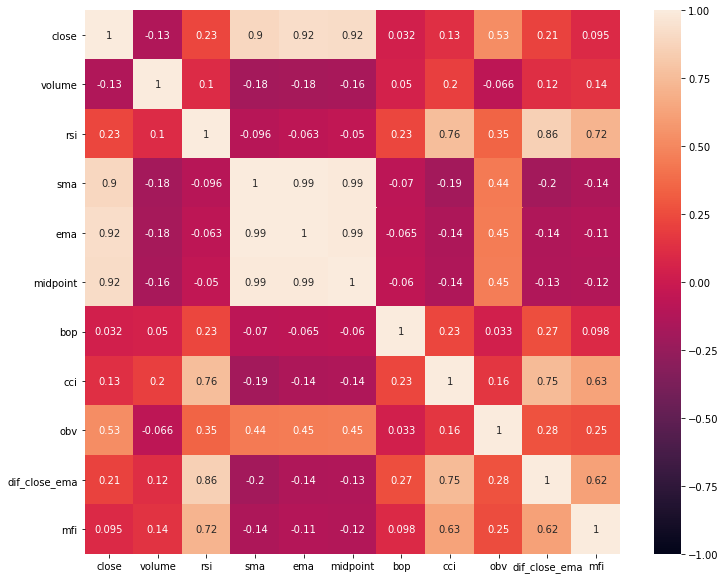

In [ ]:
#let's use the visuals - the heatmap to see the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

#lot's of correlated data: sma, ema, midpoint, rsi, cci, will drop them

In [ ]:
#Dropped. Left with cols I'll work
drop_cols = ['ema', 'midpoint', 'rsi', 'sma', 'cci', 'close', 'dif_close_ema']
df_all.drop(drop_cols, axis = 1, inplace=True)
df_all.head()

,volume,bop,obv,mfi
0,-0.325180,0.549961,1.847931,0.376388
1,-0.563425,-0.967617,1.739544,-0.399603
2,-1.260691,0.100799,1.696355,-1.053182
3,-1.106759,1.292334,1.753938,-1.121610
4,0.453180,1.522974,1.957382,0.058659


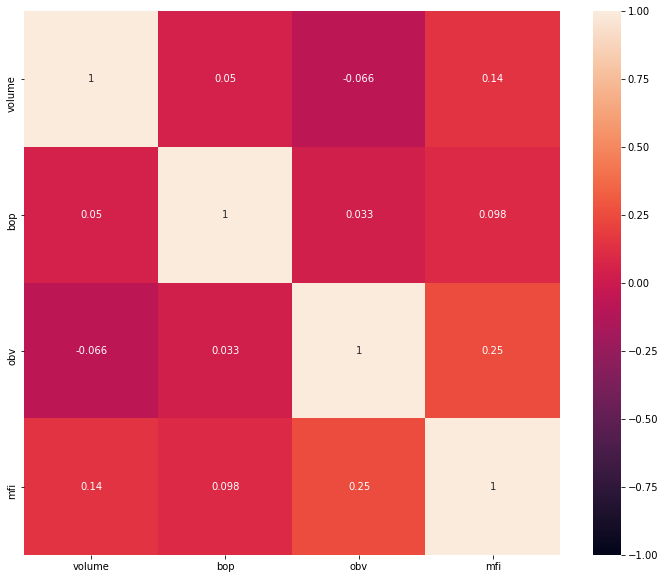

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
df_scaled.shape

(197, 15)

In [ ]:
X = df_all #the features to predict the value

In [ ]:
X

,volume,bop,obv,mfi
0,-0.325180,0.549961,1.847931,0.376388
1,-0.563425,-0.967617,1.739544,-0.399603
2,-1.260691,0.100799,1.696355,-1.053182
3,-1.106759,1.292334,1.753938,-1.121610
4,0.453180,1.522974,1.957382,0.058659
...,...,...,...,...
136,-0.609629,0.507168,0.344227,-1.042799
137,-0.494867,0.837201,0.444116,-0.479687
138,-0.120797,1.454485,0.626982,0.382005
139,1.217285,-0.730455,1.106663,1.566494


In [ ]:
#getting the elbow plot to see what might be the right number of clusters

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20)

for k in K: #Building and fitting the model kmeanModel = KMeans(n_clusters=k).fit(X) kmeanModel.fit(X)
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                  'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
             'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

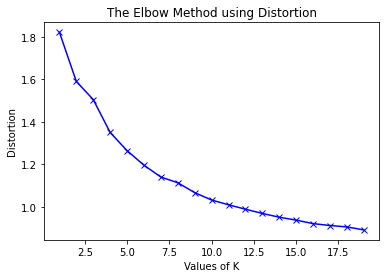

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

#will try between 5 and 10

In [ ]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(X)
y_pred = kmeans.predict(X)
print(y_pred)

[1 0 0 ... 1 4 1]


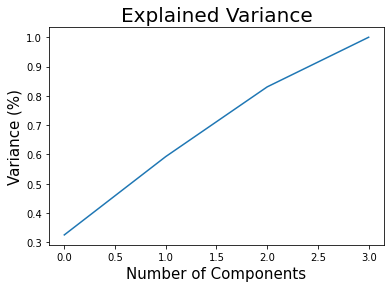

In [ ]:
from sklearn.decomposition import PCA

# pass through the scaled data set into our PCA class object
pca = PCA().fit(X)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

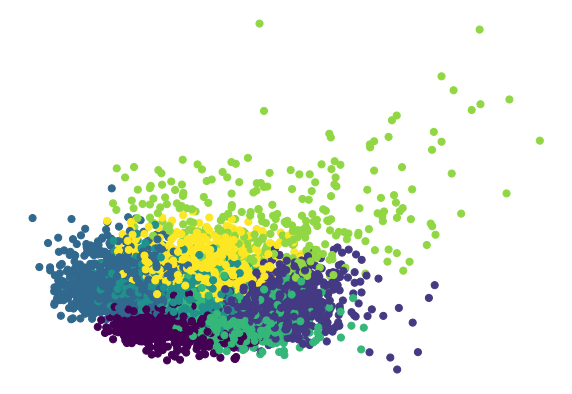

In [ ]:
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10,7))
colours = 'rbgymrck'
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred, s=50, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
from sklearn import datasets, metrics
print(metrics.silhouette_score(X, y_pred, metric='euclidean')) 
#silhouette score gave the best result at number of clusters = 7, from 2 to 6 performed poorly.

0.21586971710604747


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#number of labels and their values
pd.Series(kmeans.labels_).value_counts() 

4    1542
2    1490
1    1387
6    1251
3    1243
0    1197
5     315
dtype: int64

In [ ]:
# adding a label to a df_all
df_all['label'] = kmeans.labels_ 
df_all['label'] = df_all['label'].astype(str)

In [ ]:
centroids = df_all.groupby(['label']).mean() 
#grouping by label, shows avg 

In [ ]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.399679,-0.746346,0.726925,-0.710481
1,-0.111593,0.902696,0.901398,0.809070
2,0.020759,-0.764727,-1.035620,-0.850745
3,-0.317657,0.994998,-0.017467,-0.910946
4,-0.163885,-0.869673,0.402864,0.864594
5,3.692429,0.176022,0.053463,0.590276
6,0.069311,0.663138,-0.954149,0.486843


In [ ]:
#df_orig[df_all['label'] == '1']


In [ ]:
import umap
import time

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.4,
                      metric='euclidean').fit_transform(df_all)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 21.25525140762329 seconds


In [ ]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(umap_results)
y_pred = kmeans.predict(umap_results)
print(y_pred)

[5 0 0 ... 5 1 5]


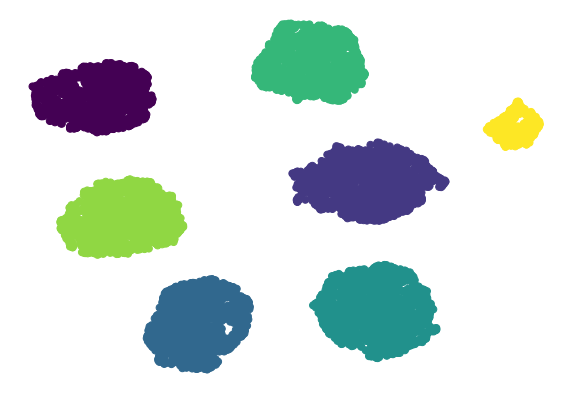

In [ ]:
plt.figure(figsize=(10,7))
colours = 'rbgymrckw'
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=y_pred, s=50, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
from sklearn import datasets, metrics
print(metrics.silhouette_score(X, y_pred, metric='euclidean')) 

0.44640164689272954


In [ ]:
pd.Series(kmeans.labels_).value_counts() 

1    1542
3    1490
5    1387
4    1251
2    1243
0    1197
6     315
dtype: int64

In [ ]:
centroids = df_all.groupby(['label']).mean() 
#grouping by label, shows avg 

In [ ]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.399679,-0.746346,0.726925,-0.710481
1,-0.111593,0.902696,0.901398,0.809070
2,0.020759,-0.764727,-1.035620,-0.850745
3,-0.317657,0.994998,-0.017467,-0.910946
4,-0.163885,-0.869673,0.402864,0.864594
5,3.692429,0.176022,0.053463,0.590276
6,0.069311,0.663138,-0.954149,0.486843


We will look at the best cluster with the better metric params for going long(stock price goes up) as opposite to short(when betting that the price will go down).

MFI - Money flow is calculated by averaging the high, low and closing prices, and multiplying by the daily volume. Comparing that result with the number for the previous day tells traders whether money flow was positive or negative for the current day.

OBV - on-balance volume. The formula generates a smooth indicator line that carves out highs, lows, and trendlines similar to price bars.  Generates more actionable signals than the green or red volume histogram. 

BOP - measures the market strength of buyers against sellers by assessing the ability of each side to drive prices to an extreme level.

VOLUME - trading volume is a measure of how much of a given financial asset has traded in a period of time. For stocks, volume is measured in the number of shares traded.

In [ ]:
#quality of clusters:
centroids['quality'] = 0
centroids['quality'] = centroids['obv'] + centroids['bop'] - centroids['mfi']
print(centroids)

#high quality 5, low quality 6

         volume       bop       obv       mfi   quality
label                                                  
0     -0.399679 -0.746346  0.726925 -0.710481  0.691060
1     -0.111593  0.902696  0.901398  0.809070  0.995024
2      0.020759 -0.764727 -1.035620 -0.850745 -0.949601
3     -0.317657  0.994998 -0.017467 -0.910946  1.888477
4     -0.163885 -0.869673  0.402864  0.864594 -1.331403
5      3.692429  0.176022  0.053463  0.590276 -0.360791
6      0.069311  0.663138 -0.954149  0.486843 -0.777854


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(df_all)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8425 samples in 0.014s...
[t-SNE] Computed neighbors for 8425 samples in 0.722s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8425
[t-SNE] Computed conditional probabilities for sample 2000 / 8425
[t-SNE] Computed conditional probabilities for sample 3000 / 8425
[t-SNE] Computed conditional probabilities for sample 4000 / 8425
[t-SNE] Computed conditional probabilities for sample 5000 / 8425
[t-SNE] Computed conditional probabilities for sample 6000 / 8425
[t-SNE] Computed conditional probabilities for sample 7000 / 8425
[t-SNE] Computed conditional probabilities for sample 8000 / 8425
[t-SNE] Computed conditional probabilities for sample 8425 / 8425
[t-SNE] Mean sigma: 0.318211
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.767242
[t-SNE] KL divergence after 500 iterations: 1.324870
t-SNE done! Time elapsed: 37.63040614128113 seconds


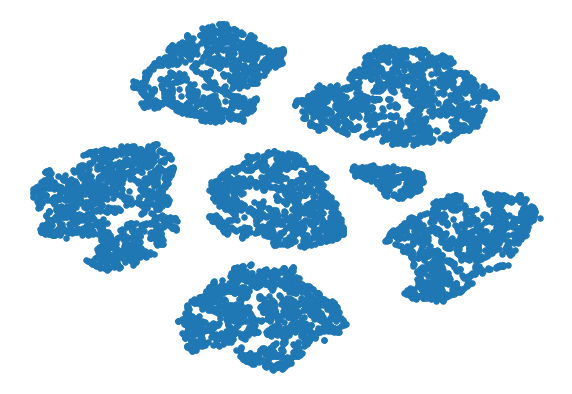

In [ ]:
plt.figure(figsize=(10,7))
colours = 'rbgym'
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=30, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
#no clustering yet, just in 2 dimensions

In [ ]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(tsne_results)
y_pred = kmeans.predict(tsne_results)
print(y_pred)

[0 6 6 ... 0 1 0]


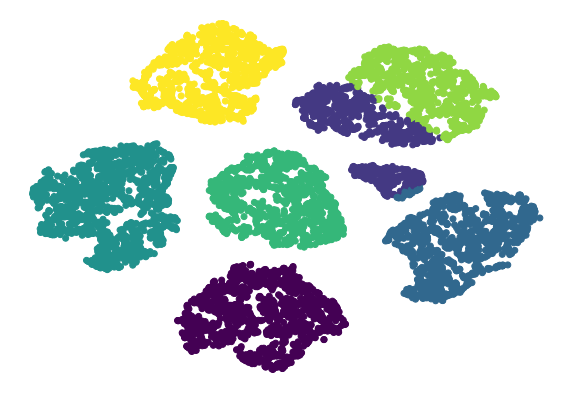

In [ ]:
#tsne = PCA(n_components=2).fit_transform(tsne_results)

plt.figure(figsize=(10,7))
colours = 'rbgymrc' #kp'
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_pred, #s=50, 
            cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
pd.Series(kmeans.labels_).value_counts() 


3    1490
0    1387
2    1292
4    1243
6    1197
5     930
1     886
dtype: int64

In [ ]:
centroids = df_all.groupby(['label']).mean() #grouping by label, shows avg 

In [ ]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.399679,-0.746346,0.726925,-0.710481
1,-0.111593,0.902696,0.901398,0.809070
2,0.020759,-0.764727,-1.035620,-0.850745
3,-0.317657,0.994998,-0.017467,-0.910946
4,-0.163885,-0.869673,0.402864,0.864594
5,3.692429,0.176022,0.053463,0.590276
6,0.069311,0.663138,-0.954149,0.486843


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 15

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

#the more the clusters the worse the result

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.37455807001043345
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.3325177070403479
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.3680837458866431
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.3880158871186579
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.41463548981497755
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.44640164689272954
-------------------------------------

Model Evaluation. The yellowbrick library, we get to access the SilhouetterVisualizer which will help visualize the silhouette score for each point in that particular cluster. What we are looking for is that each cluster exceeds the red line or the average silhouette score and that the clusters are as evenly distributed as possible. The clusters below 0 or above are outliers that are tricky to group.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



----------------------------------------------------------------------------------------------------


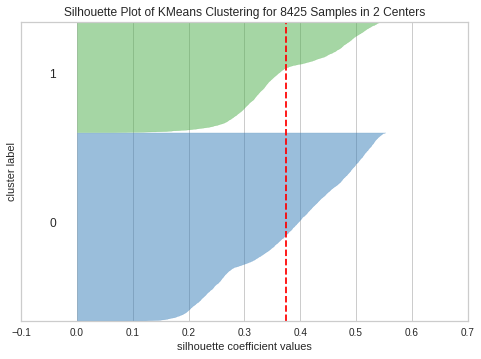

----------------------------------------------------------------------------------------------------


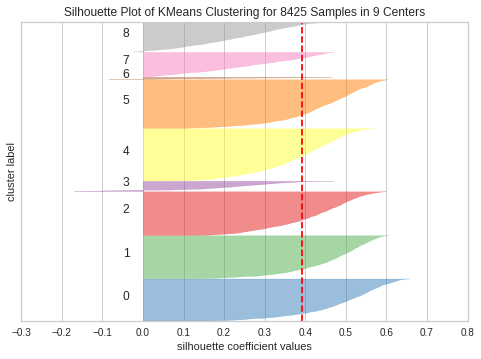

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,9]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=55)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X)

    # show the chart
    visualizer.poof()

----------------------------------------------------------------------------------------------------


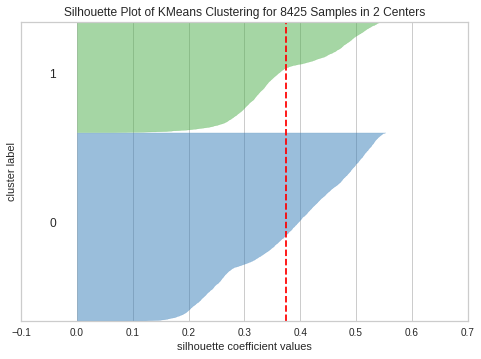

----------------------------------------------------------------------------------------------------


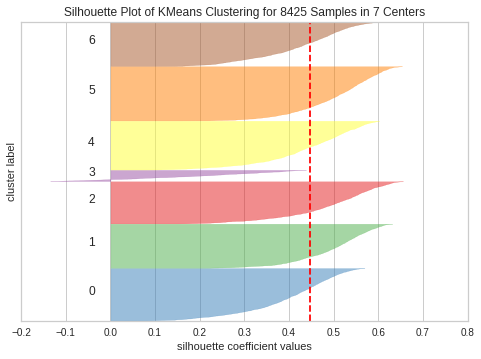

In [ ]:
clusters = [2,7]

for cluster in clusters:

    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X)

    # show the chart
    visualizer.poof()

In [ ]:
list(df_all.index.values.tolist())

In [ ]:
from ipywidgets import interact

In [ ]:
px.scatter(data_frame=df_all, x='volume', y='mfi', color = 'label', hover_data=['bop', 'obv'])

In [ ]:
'''@interact
def plotting(x=df_orig.columns, y = df_orig.columns):
    fig = px.scatter(data_frame=df_orig, x= bop, y= y, color = 'cluster', hover_data=['label', 'mfi', 'volume'])
    fig.show()'''

<Figure size 648x504 with 0 Axes>

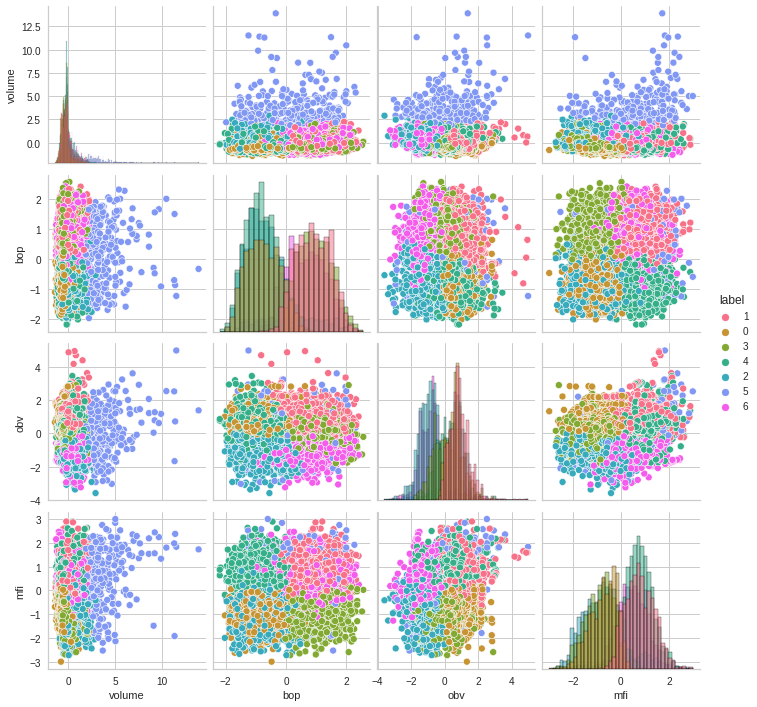

<Figure size 648x504 with 0 Axes>

In [ ]:
sns.pairplot(df_all, hue="label", diag_kind="hist")
plt.figure(figsize=(9,7))
#very interesting.. We can actually see the clusters very distintcly at some plots.
#amazing tool for futher investigation. 
#cluster 3 is rich on volume, which means stocks are actively traded. Many outliers too. I'll look more in depth in this cluster
#X

In [ ]:
#building a model:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#X = bop, mfi, obv
y = df_all['return']

In [ ]:
df_all['return']

14     0.036060
15    -0.005942
16    -0.023057
17     0.025350
18     0.103154
         ...   
150    0.003115
151    0.018634
152    0.064024
153    0.068768
154    0.048257
Name: return, Length: 8425, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_all[['volume','bop','obv','mfi']].to_numpy(),y, test_size = 0.2, random_state = 55)

In [ ]:
X

(array([-0.40625   , -0.15625   , -0.08333333,  0.20013342,  0.35230352,
         0.27272727, -0.66666667,  0.18570102,  0.45      ,  0.26086957,
         0.77777778, -0.57575758, -0.64705882, -0.75      ,  0.46551724,
        -0.51515152, -0.88443396, -0.25510204, -0.18181818,  0.57142857,
        -0.24615385, -0.52459016, -0.64285714,  0.08510638, -0.54545455,
        -0.56923077,  0.24390244,  0.43794414, -0.45714286, -0.65625   ,
        -0.47457627, -0.53191489, -0.65      ,  0.44444444, -0.1       ,
        -0.42424242, -0.94736842, -0.76785714, -0.4567079 ,  0.06896552,
         0.18604651, -0.18867925,  0.39534884, -0.77363897,  0.85714286,
        -0.20833333, -0.03811944, -0.89772727, -0.5974026 ,  0.41610738,
        -0.29982363, -0.2519685 , -0.43103448, -0.13483146,  0.31325301,
        -0.29457364,  0.20135917, -0.67434019,  0.2816092 , -0.23943662,
        -0.83766234,  0.27027027,  0.03225806, -0.83606557, -0.72      ,
         0.60465116, -0.29411765,  0.80434783,  0.7

In [ ]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

In [ ]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


In [ ]:
df_orig.reset_index(drop=True)

AAL                           ...        ZM                           
      open     high    low    close  ...      high       low   close   volume
0    28.98  29.2950  28.65  29.0900  ...   69.2350   68.0200   68.64  1285006
1    28.27  28.2900  27.34  27.6500  ...   68.6800   67.1000   67.28  1080659
2    27.19  27.4901  27.08  27.3200  ...   70.4950   65.8116   70.32  2969660
3    27.56  27.6800  27.06  27.2200  ...   72.8391   69.4500   71.90  6894638
4    27.10  28.0900  27.07  27.8400  ...   73.2900   71.0300   72.55  2417287
..     ...      ...    ...      ...  ...       ...       ...     ...      ...
206  12.39  12.4500  11.67  11.8000  ...  541.1050  510.3100  517.79  9802120
207  11.78  11.7900  11.20  11.2392  ...  540.0000  513.3000  538.99  6798844
208  10.89  11.1600  10.63  10.9500  ...  553.8594  511.5001  515.59  8239325
209  10.96  11.2900  10.89  11.1550  ...  525.4550  483.5000  489.84  8824814
210  11.06  11.4150  10.98  11.2755  ...  495.9500  457.0201  460.90  8408056

[211 rows x 555 columns]

In [ ]:
stock_df

In [ ]:
df_orig.reindex

<bound method DataFrame.reindex of                              AAL                  ...        ZM                 
                            open     high    low  ...       low   close   volume
time                                              ...                           
2020-01-02 05:00:00+00:00  28.98  29.2950  28.65  ...   68.0200   68.64  1285006
2020-01-03 05:00:00+00:00  28.27  28.2900  27.34  ...   67.1000   67.28  1080659
2020-01-06 05:00:00+00:00  27.19  27.4901  27.08  ...   65.8116   70.32  2969660
2020-01-07 05:00:00+00:00  27.56  27.6800  27.06  ...   69.4500   71.90  6894638
2020-01-08 05:00:00+00:00  27.10  28.0900  27.07  ...   71.0300   72.55  2417287
...                          ...      ...    ...  ...       ...     ...      ...
2020-10-26 04:00:00+00:00  12.39  12.4500  11.67  ...  510.3100  517.79  9802120
2020-10-27 04:00:00+00:00  11.78  11.7900  11.20  ...  513.3000  538.99  6798844
2020-10-28 04:00:00+00:00  10.89  11.1600  10.63  ...  511.5001  515.59  8

In [ ]:
#plan: Linear Regression, x_train, y_train, apply, 

In [ ]:
#df_all['label' == 1].sum()


In [ ]:
#df_all[df_all =='1'].mean()

In [ ]:
#cluster 6. 
#take avg of metrics, money flow - is low is better, bop - the higher is better, + in a bullish territory, obv - trend following indicator, should be positive
#mfi money flow index, the lower is better, 
#obv + bop - mfi = metric to see the best cluster. 
#higher it is the higher the chance to go up, take the best cluster. 

#calculate return in a stock df

In [ ]:
#to get the cluster's tickers
#df_orig[df_all['label'] == '1']


In [ ]:
#total stock return: (close - open)+dividends/open